# Network Analysis in Python

**NetworkX**: Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Installation: 
`$ pip install networkx`

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## I. Networks Basics

### 1. Create & Manipulate Networks 

Let's start with simple undirected and unweighted networks. An example of such networks, where we don't have edge direction (in/out) or edge weight (indicating how strong a connection is), would be the Facebook network. If you are a friend of mine, I am a friend of yours, and the edge connecting us is either 1 (connected) or non-existent (not connected). We will generate more complex networks later on.

**Nodes**: can represent anything (images, webpage URL links, people, power stations, numbers, etc.)

**Edges**: represent relationships between nodes

In [2]:
# create empty network
G = nx.Graph()

In [3]:
# add one node with label '1'
G.add_node('Mary')

In [4]:
# add nodes from a list of elements
G.add_nodes_from(['Mary', 'Steven', 'Alice'])

In [5]:
# remove node
G.remove_node(1)

NetworkXError: The node 1 is not in the graph.

In [6]:
# remove multiple nodes
G.remove_nodes_from(['Mary', 'Steven'])

In [7]:
# view nodes in network G
G.nodes

NodeView(('Alice',))

In [8]:
# add single edge - tuple of nodes (source, target)
# this also adds nodes if they don't already exist
G.add_edge('Mary','Steven')

In [9]:
# add multiple of edges (list of tuples)
G.add_edges_from([('Mary', 'Steven') , ('Mary', 'Alice')])

In [10]:
# view edges in network G
G.edges

EdgeView([('Alice', 'Mary'), ('Mary', 'Steven')])

In [11]:
# remove edge
G.remove_edge('Mary','Alice')

In [12]:
# remove multiple edges (list of tuples)
G.remove_edges_from([('Mary', 'Steven') , ('Mary', 'Alice')])

In [13]:
# get number of nodes in network G
G.number_of_nodes()

3

In [14]:
# get number of edges in network G
G.number_of_edges()

0

In [15]:
# get Alice's neighbors (retrieves a dictionary)
dict_neighbors = G.neighbors('Alice')

In [16]:
# get Alice's number of neighbors (connections)
G.degree('Alice')

0

In [17]:
# empty the network
G.clear()

**Load network from file.** You can read/write a graph in a file using common graph formats (edge lists, adjacency lists, GML, GraphML, pickle, LEDA, etc.).

In [18]:
# read edgelist
G = nx.read_edgelist("test.edgelist")

# write edgelist
nx.write_edgelist(G, "test.edgelist")

FileNotFoundError: [Errno 2] No such file or directory: 'test.edgelist'

### 2. Network Types 

#### a. Weighted Graphs

**Edge weight.** Consider that the edge that you are adding should contain additional information, such as the strength of the connection. This would be important, for example, when analyzing communication networks to check friendship/connectivity strength. You want to capture how many times they exchanged e-mails, calls, text messages, to indicate the strength of the connection. For this you will assign weights to the edge, values that can be the number of communications, or the fraction of communications, normalized.

In [19]:
# assign weight to edge
G.add_edge('Mary','Steven', weight=5)

In [20]:
# access edge weight
G['Mary']['Steven']

{'weight': 5}

In [21]:
# change edge weight
G['Mary']['Steven']['weight'] = 6

#### b. Directed Graphs

**Edge direction.**

In [22]:
dg = nx.DiGraph()

In [23]:
# you can create an undirected representation of network G
nx.to_undirected(G)

In [24]:
# you can create a directed representation of network G
nx.to_directed(G)

#### c. Multigraphs

Many algorithms are not well defined on such graphs. Therefore, you should convert such graphs rather to a standard graph in a way that makes the measurement well defined.

In [25]:
# multigraphs can store multiple edges information between same two nodes that can have different properties
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 3.0), (1, 2, 75), (2, 3, 5)])

In [26]:
# shows the edges with no weights
MG.edges

MultiEdgeView([(1, 2, 0), (1, 2, 1), (2, 3, 0)])

In [27]:
# shows the weights of the edges as well
MG.edges.data('weight', default=1)

MultiEdgeDataView([(1, 2, 3.0), (1, 2, 75), (2, 3, 5)])

In [28]:
# check the weight of an edge
MG[1][2]

AtlasView({0: {'weight': 3.0}, 1: {'weight': 75}})

### 3. Network Models

There are a miriad of network models with different topological properties. Here we will try out some of the most useful ones (that frequently occur in real complex systems). 

For more network generation classes: https://networkx.github.io/documentation/networkx-1.10/reference/generators.html

In [29]:
# Barabasi-Albert (scale-free) network 
ba = nx.barabasi_albert_graph(50, 3)

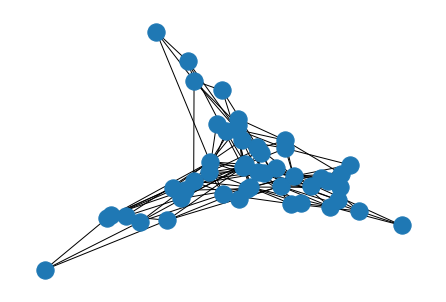

In [30]:
nx.draw_spectral(ba)

In [31]:
# Erdos-Renyi (random) network 
er = nx.erdos_renyi_graph(50, 0.1)

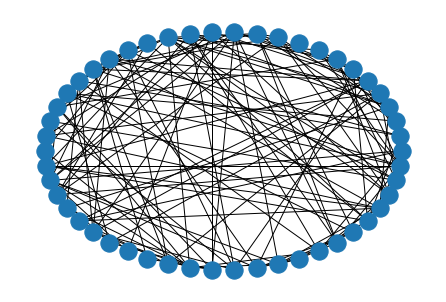

In [32]:
nx.draw_circular(er)

In [ ]:
# Watts-Strogatz (small-world) network 
ws = nx.watts_strogatz_graph(50, 6, 0.2)

In [ ]:
nx.draw_circular(ws)

In [ ]:
# random geometric graph (RGG)
rgg = nx.random_geometric_graph(200,0.125)

In [ ]:
nx.draw(rgg)

In [ ]:
# complete graph (every pair of nodes is connected by a unique edge)
complete = nx.complete_graph(6)

In [ ]:
nx.draw(complete)

## II. Analysis of Structural Properties

#### a. Node degree, network average degree, degree distribution

In [ ]:
degrees = [deg for node, deg in nx.degree(G)]

In [ ]:
# kmin - minimum degree
kmin = np.min(degrees)

# kmax - maximum degree
kmax = np.max(degrees)

# kavg - average degree of the network
kavg = np.mean(degrees)

**Degree distribution**: helps us understand connectivity trends in networks and how edges are distributed among nodes (does everyone have similar number of connections, or do we have hubs, nodes with significantly higher number of connections?)

In [ ]:
def degree_distr(net):
    degrees = dict(net.degree()) 
    hist = list(Counter(degrees.values()).items()) 
    hist.sort(key=lambda x:x[0])
    hist = np.array(hist)
    return hist

#### b. Paths on Networks: average path length, shortest path, longest path

In [ ]:
# find shortest path in directed & undirected network
nx.shortest_path(G,’b’,’d’)
nx.shortest_path(g,’b’,’d’, weighted=True)

#### c. Clustering coefficient, triangles

In [ ]:
# triangles
nx.triangles(G)

In [ ]:
# clustering coefficient of a node
nx.clustering(G, node)

In [ ]:
# clustering coefficient of all nodes (returns a dictionary)
nx.clustering(G)

In [ ]:
# clustering coefficient of the network
cc = nx.clustering(G)
avg_clust = sum(cc.values()) / len(cc)
print(avg_clust)

#### d. Centrality measures

In [ ]:
# betweenness centrality of network
nx.betweenness_centrality(G)

In [ ]:
# closeness centrality of network
nx.closeness_centrality(G)

In [ ]:
# eigenvector centrality of network
nx.eigenvector_centrality(G)

In [ ]:
# degree centrality
nx.degree_centrality(G)

#### e. Components

In [ ]:
# find number of connected components
nx.number_connected_components(G)

In [ ]:
# get the nodes in the same component as *n*
nx.node_connected_component(G, "Alice")

#### f. Assortativity

* Pearson correlation coefficient [-1; 1]
* social networks are highly assortative (homophily): high degree nodes connect to other high degree nodes
* technological are disassortative: high degree nodes connect to low degree nodes

In [ ]:
nx.degree_assortativity_coefficient(G)

## III. Network Visualization

* in Python: Matplotlib or Graphviz with pydot (import and export NetworkX graphs in Graphviz dot format using pydot)
* Gephi
* Graphviz
* Neo4j
* etc.

Basic drawing methods: 
* `nx.draw()`
* `nx.random()`
* `nx.draw_spectral()`
* `nx.draw_circular()`

In [ ]:
# simplest way to draw a graph
nx.draw(G)

## IV. Case Study: Real Network Analysis from Data
using ***Graph Embedding with Self Clustering: Facebook data*** 

- data location: SNAP (Stanford Large Network Dataset Collection)
- source: B. Rozemberczki, R. Davies, R. Sarkar and C. Sutton. GEMSEC: Graph Embedding with Self Clustering. 2018.

<img src="data.png" alt="Data" style="width: 300px;"/>

* nodes: pages
* edges: mutual likes among them -> this means undirected & networks


There are 8 different networks representing different categories. For our current analysis, we will analyze and compare 4 networks `Company`, `Artist`, `Politician` and `Public Figure`, however, you can play with all of them to get used to manipulating networks and computing structural property measures, and to gain insights about the data.

### 1. Load network from file

In [33]:
# load edgelists from data file
co_net = nx.read_edgelist("facebook_clean_data/company_edges.csv", delimiter=',')
art_net = nx.read_edgelist("facebook_clean_data/artist_edges.csv", delimiter=',')
poli_net = nx.read_edgelist("facebook_clean_data/politician_edges.csv", delimiter=',')
pub_net = nx.read_edgelist("facebook_clean_data/public_figure_edges.csv", delimiter=',')

### 2. Analyze network

In [34]:
# check number of nodes and edges 
N = len(poli_net.nodes)
print(N)

E = len(poli_net.edges)
print(E)

5910
41730


Let's see what is on average the number of mutual 'Likes' (connections) each page (node) has. 

In [35]:
# calculate average degree of politician pages
degrees = [deg for node, deg in nx.degree(poli_net)]
kavg = np.mean(degrees)
print("The # of mutual likes politician pages have on average:", kavg)

# calculate average degree of artist pages
degrees = [deg for node, deg in nx.degree(art_net)]
kavg = np.mean(degrees)
print("The # of mutual likes artist pages have on average:", kavg)

# calculate average degree of company pages
degrees = [deg for node, deg in nx.degree(co_net)]
kavg = np.mean(degrees)
print("The # of mutual likes company pages have on average:", kavg)

# calculate average degree of public figure pages
degrees = [deg for node, deg in nx.degree(pub_net)]
kavg = np.mean(degrees)
print("The # of mutual likes public figure pages have on average:", kavg)

The # of mutual likes politician pages have on average: 14.121827411167512
The # of mutual likes artist pages have on average: 32.4368826335689
The # of mutual likes company pages have on average: 7.41211477151966
The # of mutual likes public figure pages have on average: 11.604564709950722


What about the degree distribution in the networks?

In [36]:
hist_poli = degree_distr(poli_net)
hist_art = degree_distr(art_net)
hist_co = degree_distr(co_net)
hist_pub = degree_distr(pub_net)

plt.figure()
plt.loglog(hist_poli.T[0],hist_poli.T[1],'ro-')
plt.loglog(hist_art.T[0],hist_art.T[1],'ko-')
plt.loglog(hist_co.T[0],hist_co.T[1],'go-')
plt.loglog(hist_pub.T[0],hist_pub.T[1],'bo-')
plt.legend(['Politician', 'Artist', 'Company', 'Public Figure'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Facebook Networks by Category')
plt.savefig('fb_network_degree_distr.png')

NameError: name 'degree_distr' is not defined

In [37]:
# we can check assortativity
nx.degree_assortativity_coefficient(pub_net)

0.2021701278902857

In [38]:
# check clustering coefficient
cc = nx.clustering(poli_net)
avg_cc_poli = sum(cc.values()) / len(cc)
print("Politician network clustering coefficient:", avg_cc_poli)

cc = nx.clustering(art_net)
avg_cc_art = sum(cc.values()) / len(cc)
print("Artist network clustering coefficient:", avg_cc_art)

cc = nx.clustering(co_net)
avg_cc_co = sum(cc.values()) / len(cc)
print("Company network clustering coefficient:", avg_cc_co)

cc = nx.clustering(pub_net)
avg_cc_pub = sum(cc.values()) / len(cc)
print("Public figure network clustering coefficient:", avg_cc_pub)

Politician network clustering coefficient: 0.3849658056153406
Artist network clustering coefficient: 0.13811495287065234
Company network clustering coefficient: 0.2392079390902055
Public figure network clustering coefficient: 0.17931624101983312


### 3. Visualize network
What you've all been waiting for! 

Disclaimer: visualizations can be pretty and insightful, however for large networks they tend to be just pretty! Knowing how to compute network measures is the key!

### 4. Takeaways

* politician network has highest clustering coefficient (CC = 0.39) -> political views tend to cluster people more densely
* public figure network is has the highest assortativity -> the only network that reflects human relationship type of connectivity
* disassortativity seen in company, politician, artist networks may be indicative of competitiveness, desire not to like/promote other popular peers
* lowest average degree found in company network
* highest average degree seen in artist network
* each network has similar degree distribution with heavy tail -> most nodes have small number of connections, while a few nodes (hubs) have significantly higher number of links
* and many more insights with more detailed analyses -> it is your homework to explore more! :)